In [1]:
#Подключение необходимых библиотек:
!pip install keras
import numpy as np
import pandas as pd
import os
import time
import librosa as lr
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Загрузка датасетов с женскими голосами:
path = './drive/My Drive/TESS' 
start = time.time() 
data = [] 
for subdir, dirs, files in os.walk(path): 
  for file in files: 
    target = str(file.split('_')[2])[:-4]
    y, sr = lr.load(os.path.join(subdir, file), res_type='kaiser_fast') 
    mfccs = np.mean(lr.feature.mfcc(y=y, sr=sr, n_mfcc=30).T, axis=0) 
    sample = mfccs, target
    data.append(sample)  

end = time.time() 
print(f'Writing ended in {end - start} seconds')

Writing ended in 14.306806087493896 seconds


In [ ]:
 #Создание датафреймов из загруженных файлов:
X, y = zip(*data)
dataset_TESS = pd.DataFrame(X, (y))
dataset_TESS = dataset_TESS.reset_index()
dataset_TESS.rename(columns={'index': 'target'}, inplace = True)
dataset_TESS

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,angry,-387.848389,62.646721,-12.743510,3.633192,-20.432579,8.582813,-30.586241,-6.209076,-24.156458,...,-1.993752,0.272754,-8.404673,11.200960,9.025971,19.935123,21.562492,27.306807,17.665371,8.602740
1,angry,-396.518036,48.463688,-16.743259,-1.947794,-8.451904,13.687363,-33.848671,-0.855622,-14.215148,...,-0.966764,6.902401,0.909252,18.543150,24.366343,24.389969,17.859188,11.076797,1.502624,7.227300
2,angry,-380.698669,45.832466,-17.954929,0.997867,-8.282386,7.092790,-24.572128,0.248927,-13.018392,...,-1.838598,-3.714519,-6.379383,6.313316,9.110631,17.793064,20.613012,20.938890,14.872869,10.774837
3,angry,-387.314240,51.638634,-21.299923,-8.453689,-10.510151,13.878303,-33.133362,2.985414,-19.081837,...,-0.600075,-0.290159,-3.371307,15.423805,21.924212,28.882711,29.863852,22.317430,13.140749,7.206078
4,angry,-421.122894,50.358196,-10.812489,5.446944,-4.558140,7.821395,-27.386854,3.531337,-17.720602,...,2.751695,4.001417,3.726227,18.973837,19.694990,24.079102,21.175922,13.588066,6.826827,3.867915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,angry,-412.940277,41.884449,-10.807510,-7.166347,-15.227619,18.904638,-24.108419,7.186980,-22.829916,...,1.965003,2.011531,-2.001516,10.907784,17.329451,25.461334,25.760460,23.709106,8.046818,6.444272
179,angry,-449.993774,49.416267,-11.046038,1.674091,-0.254566,8.284852,-26.158485,4.050467,-13.458520,...,3.455191,-0.084090,0.538806,12.126320,13.550502,22.520462,23.276052,24.933815,16.979248,11.090622
180,angry,-403.527161,56.158184,-20.870501,-5.758169,-16.731005,8.225205,-18.353601,-0.962509,-18.259876,...,-2.786020,-1.581806,0.471481,17.107603,21.496248,29.945570,22.546320,17.001144,9.270882,1.863981
181,angry,-400.663971,75.348175,-13.725406,-16.594097,-6.996043,9.053338,-34.310921,0.602586,-17.079975,...,-4.817045,0.708802,-1.676965,15.525968,21.348347,25.545237,24.664001,15.942770,8.561031,6.953091


In [ ]:
#Замена текстовых полей с эмоциями на числовые коды:
emotions = {
            '00': 'neutral',
            '01': 'happy',
            '02': 'sad',  
            '03': 'angry',  
            '04': 'fear',  
            '05': 'digust',  
            '06': 'ps',      
           } 

X, y = zip(*data)
Y = []
emotions_inv = {value: key for key, value in emotions.items()}
for i in range(len(y)):
  Y.append(int(emotions_inv[y[i]]))

dataset_fem = pd.DataFrame(X, (Y))
dataset_fem = dataset_fem.reset_index()
dataset_fem.rename(columns = {'index': 'target'}, inplace = True)
dataset_fem

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,3,-387.848389,62.646721,-12.743510,3.633192,-20.432579,8.582813,-30.586241,-6.209076,-24.156458,...,-1.993752,0.272754,-8.404673,11.200960,9.025971,19.935123,21.562492,27.306807,17.665371,8.602740
1,3,-396.518036,48.463688,-16.743259,-1.947794,-8.451904,13.687363,-33.848671,-0.855622,-14.215148,...,-0.966764,6.902401,0.909252,18.543150,24.366343,24.389969,17.859188,11.076797,1.502624,7.227300
2,3,-380.698669,45.832466,-17.954929,0.997867,-8.282386,7.092790,-24.572128,0.248927,-13.018392,...,-1.838598,-3.714519,-6.379383,6.313316,9.110631,17.793064,20.613012,20.938890,14.872869,10.774837
3,3,-387.314240,51.638634,-21.299923,-8.453689,-10.510151,13.878303,-33.133362,2.985414,-19.081837,...,-0.600075,-0.290159,-3.371307,15.423805,21.924212,28.882711,29.863852,22.317430,13.140749,7.206078
4,3,-421.122894,50.358196,-10.812489,5.446944,-4.558140,7.821395,-27.386854,3.531337,-17.720602,...,2.751695,4.001417,3.726227,18.973837,19.694990,24.079102,21.175922,13.588066,6.826827,3.867915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,3,-412.940277,41.884449,-10.807510,-7.166347,-15.227619,18.904638,-24.108419,7.186980,-22.829916,...,1.965003,2.011531,-2.001516,10.907784,17.329451,25.461334,25.760460,23.709106,8.046818,6.444272
179,3,-449.993774,49.416267,-11.046038,1.674091,-0.254566,8.284852,-26.158485,4.050467,-13.458520,...,3.455191,-0.084090,0.538806,12.126320,13.550502,22.520462,23.276052,24.933815,16.979248,11.090622
180,3,-403.527161,56.158184,-20.870501,-5.758169,-16.731005,8.225205,-18.353601,-0.962509,-18.259876,...,-2.786020,-1.581806,0.471481,17.107603,21.496248,29.945570,22.546320,17.001144,9.270882,1.863981
181,3,-400.663971,75.348175,-13.725406,-16.594097,-6.996043,9.053338,-34.310921,0.602586,-17.079975,...,-4.817045,0.708802,-1.676965,15.525968,21.348347,25.545237,24.664001,15.942770,8.561031,6.953091


In [14]:
#Загрузка датасета с мужскими голосами:
dataset_mal = pd.read_csv('./drive/My Drive/SAVEEMFCC2.csv')
dataset_fem = pd.read_csv('./drive/My Drive/TESSMFCC3.csv')

In [15]:
#Объединение датасетов в один:
dataset = dataset_mal.append(dataset_fem)
dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,3,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,...,0.016100,0.534375,1.778036,-2.088270,-1.304948,-3.518476,-4.197404,-0.128658,-1.990220,0.656227
1,3,-338.281824,123.506174,14.117956,32.017158,13.331188,2.927143,-26.489904,-4.773465,-0.012524,...,-0.852200,-0.628887,1.528692,-3.465758,0.037132,-3.344589,-3.878499,0.846600,-3.620610,-2.362210
2,3,-297.149791,93.358736,0.129330,22.744894,12.982417,-2.121561,-23.176872,-3.080107,-3.018409,...,1.651686,0.320934,0.512735,-3.433589,-1.526595,-3.662059,-3.573246,1.730579,-1.044443,0.082231
3,3,-311.721812,109.377804,-6.253777,20.515531,1.536390,-6.694665,-16.409074,3.595946,-3.917058,...,0.044090,-0.430718,1.110520,-2.731854,-3.320752,-1.710357,-0.449080,1.570524,-2.108422,-0.804175
4,3,-297.246291,116.379110,10.183396,21.690497,5.661259,-2.719891,-22.357853,-1.885126,1.837426,...,-0.271901,0.096983,1.840483,-4.119979,-0.460816,-1.817289,-3.502200,1.807018,-0.604501,-0.714024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2,-414.832950,61.244351,24.871053,47.345543,-4.288396,13.609492,-9.357812,-4.297829,-3.560240,...,-9.955692,-5.594611,-6.210800,1.612399,-1.467517,6.492705,4.678569,1.541366,-0.044082,-2.797336
2796,2,-428.959335,87.337324,22.923531,45.436908,1.115740,13.786090,-7.202889,-3.144844,-4.436021,...,-7.711856,-7.322291,-5.895929,0.338453,-1.289090,3.957989,4.913312,-0.567617,0.554816,-2.419987
2797,2,-401.938887,73.464665,13.728966,38.863063,-9.918325,10.162456,-12.362507,-3.936528,-8.784573,...,-7.777997,-6.234301,-3.543106,1.875174,4.752844,6.845292,4.896251,-2.393515,-1.021983,-2.362567
2798,2,-409.457717,96.403305,18.716205,38.404808,-8.669222,9.568859,-11.840629,-9.701875,-3.409422,...,-7.765716,-5.405130,-6.345154,-0.184834,-2.718265,3.865090,3.677224,-0.122556,2.424672,-2.263419


In [16]:
#Нормализация числовых стобцов:
var = dataset.columns[1:]
scaler = MinMaxScaler()
dataset[var] = scaler.fit_transform(dataset[var])

In [17]:
#Разбитие выборки на обучающий и тестовый датасеты:
xtrain, xtest, ytrain, ytest = train_test_split(dataset[var], dataset['target'], test_size=0.2, random_state = 1)

In [18]:
#Случайный лес:
tree = RandomForestClassifier(n_estimators=100, random_state=1)
tree.fit(xtrain, ytrain)
tree_ypred = tree.predict(xtest)

In [19]:
#Логистическая регрессия:
logist = LogisticRegression(solver='lbfgs', max_iter=10000)
logist.fit(xtrain, ytrain)
logist_ypred = logist.predict(xtest)

In [20]:
#Сверка производительности моделей:
print('Обе модели показали отличные показатели,',
      'но случайный лес отработал получше', '\n')
print('Случайный лес:')
print(classification_report(ytest, tree_ypred))

print('Логистическая регрессия:')
print(classification_report(ytest, logist_ypred))

Обе модели показали отличные показатели, но случайный лес отработал получше 

Случайный лес:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        92
           1       0.91      0.97      0.93        89
           2       0.96      0.91      0.93        86
           3       0.95      0.95      0.95       110
           4       1.00      0.95      0.97        95
           5       0.97      0.87      0.92        95
           6       0.94      0.94      0.94        89

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656

Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        92
           1       0.77      0.84      0.80        89
           2       0.90      0.90      0.90        86
           3       0.92      0.84      0.88       110
           4  

Чаще всего модель неверно определяло нейтральную эмоцию с грустью


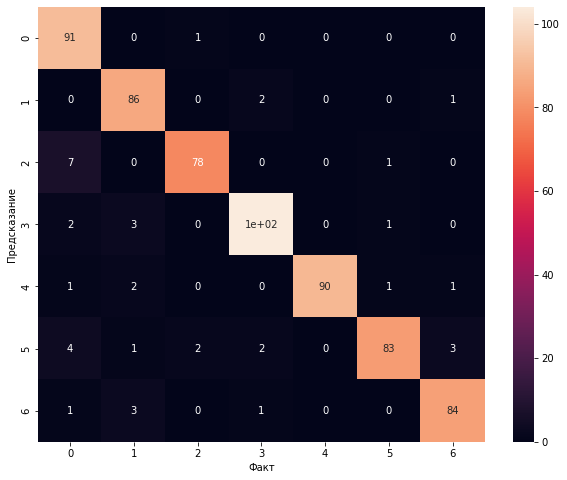

In [21]:
#Матрица несоответствий:
print('Чаще всего модель неверно определяло нейтральную эмоцию с грустью')
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, tree_ypred)), annot=True)
plt.xlabel('Факт') 
plt.ylabel('Предсказание')
plt.show()

In [22]:
#Использование deep learning для классификации:
print('Deep learning сработал очень хорошо, но немного хуже, чем случайный лес')

ytrain = tf.keras.utils.to_categorical(ytrain, num_classes=7)
ytest = tf.keras.utils.to_categorical(ytest, num_classes=7)
neur = Sequential()
neur.add(Dense(250, activation='leaky_relu', input_dim=30))
neur.add(Dense(250, activation='leaky_relu', input_dim=30))
neur.add(Dense(7, activation='softmax'))


neur.compile(loss='categorical_crossentropy', optimizer = 'adam', 
             metrics=['accuracy'])

neur.fit(xtrain, ytrain, epochs=60, batch_size=50)

test_loss, test_acc = neur.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', round(test_acc, 2))

Deep learning сработал очень хорошо, но немного хуже, чем случайный лес
Epoch 1/60
53/53 [==============================] - 0s 2ms/step - loss: 1.4181 - accuracy: 0.5823
Epoch 2/60
53/53 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.7873
Epoch 3/60
53/53 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8293
Epoch 4/60
53/53 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8506
Epoch 5/60
53/53 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8533
Epoch 6/60
53/53 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8655
Epoch 7/60
53/53 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8742
Epoch 8/60
53/53 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8803
Epoch 9/60
53/53 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8853
Epoch 10/60
53/53 [===========================